In [5]:
import numpy as np

# data for regrression:[distance, traffic_level(0=[light, 1=moderate, 2=heavy)]
XR = np.array([[5,0], [10,1], [15,2], [20,0], [25,1]])
YR = np.array([5, 15, 30, 20, 37.5]) # travel time

# Data for classification: [fever, cough, headache, stomach pain] (1=present, 0=absent)
XC = np.array([[1, 1, 0, 0], [0, 0, 1, 1], [1, 0, 0, 0]])
YC = np.array(['Flu', 'Headache', 'Unknown'])  # diagnoses

The goal is to estimate the travel time based on distance and traffic conditions of the above observational data

Traditional Programming Approach 

In [6]:
def estimate_tarvel_time(distance, traffic):
    if traffic == 'heavy':
        return distance * 2  ## Assume heavy traffic doubles the time
    elif traffic == 'moderate':
        return distance * 1.5   # Moderate traffic increases time by 50%
    else:
        return distance

In [9]:
distance = 45
traffic = 'heavy'
print(f"Estimated Travel Time: {estimate_tarvel_time(distance, traffic)} minutes")

Estimated Travel Time: 90 minutes


Machine Learning

In [10]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(XR, YR)

LinearRegression()

In [16]:
# Predict travel time
test_data = np.array([[45, 2]])  # Distance=45, Traffic=heavy       
predicted_time = model.predict(test_data)[0]
print(f" Preticted Travel Time: {predicted_time:.2f} minutes")

 Preticted Travel Time: 67.83 minutes


# Example 2: Classification - Medical Diagnosis


The goal is to classify whether a patient has a disease based on symptoms using both paradigms.

Traditional Programming Approach

In [19]:
def diagnose(symptoms):
    if ' fever' in symptoms and 'cough' in symptoms:
        return 'Flu'
    elif 'headache' in symptoms and 'stomach pain' in symptoms:
        return 'Headache'
    else:
        return 'Unknown'

In [21]:
symptoms = ['headache', 'stomach pain']
print (f"Diangnosis: {diagnose(symptoms)}")

Diangnosis: Headache


Machine Learning Approach

In [22]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier()
model.fit(XC, YC)

DecisionTreeClassifier()

In [24]:
test_data = np.array([[0,0,1,1]])
predicted_diagnosis = model.predict(test_data)[0]
print(f"Predicted Diagnosis: {predicted_diagnosis}")

Predicted Diagnosis: Headache


# Example 3: Image-Based Tasks (Complex Task)

The goal is to identify simple pattrens in an image

In [28]:
# Define the data for both paradigms
import matplotlib.pyplot as plt

# A simple 5x5 grid image where 1 represents a filled pixel and 0 represents an empty pixel
horizontal_line_image = [
    [0, 0, 0, 0, 0],
    [1, 1, 1, 1, 1],  # Horizontal line
    [0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0]
]

vertical_line_image = [
    [0, 1, 0, 0, 0],
    [0, 1, 0, 0, 0],
    [0, 1, 0, 0, 0],
    [0, 1, 0, 0, 0],
    [0, 1, 0, 0, 0]
]

# Labels for Machine Learning: 0 = No line, 1 = Horizontal line, 2 = Vertical line
X = [
    [0, 0, 0, 0, 0, 1],  # No line
    [1, 1, 1, 1, 1, 1],  # Horizontal line
    [0, 0, 0, 0, 0, 0],  # No line
    [0, 1, 0, 0, 0, 2]   # Vertical line
]
y = [0, 1, 0, 2]  # Labels

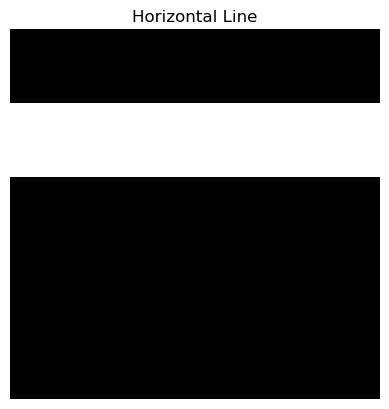

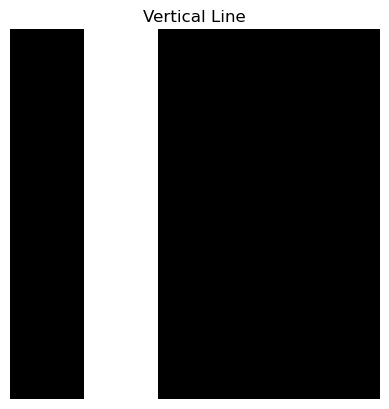

In [29]:
# Visualize the synthatic images
def visualize_image(image, title):
    plt.imshow(image, cmap='gray')
    plt.title(title)
    plt.axis('off')
    plt.show()

# Display horizontal and vertical line images
visualize_image(horizontal_line_image, 'Horizontal Line')
visualize_image(vertical_line_image, 'Vertical Line')

Traditional Programming Approach 

In [30]:
def contains_horizontal_line(image):
    for row in image:
        if all(pixel == 1 for pixel in row):
            return True
    return False

def contains_vertical_line(image):
    for col in range(len(image[0])):
        if all(row[col] == 1 for row in image):
            return True
    return False

In [31]:
print(f"Contains Horizontal Line: {contains_horizontal_line(horizontal_line_image)}")
print(f"Contains Vertical Line: {contains_vertical_line(vertical_line_image)}")

Contains Horizontal Line: True
Contains Vertical Line: True


Machine Learning Approach 

In [32]:
from sklearn.linear_model import LogisticRegression

# Train model
model = LogisticRegression()
model.fit(X, y)

LogisticRegression()

In [33]:
# Predict 1
test_image = [[0, 1, 0, 0, 0, 2]]  # Vertical line
prediction = model.predict(test_image)[0]
print(f"Predicted: {'Horizontal Line' if prediction == 1 else 'Vertical Line' if prediction == 2 else 'No Line'}")

Predicted: Vertical Line


In [34]:
# Predict 2
test_image = [[1, 1, 1, 1, 1, 1]]  # Vertical line
prediction = model.predict(test_image)[0]
print(f"Predicted: {'Horizontal Line' if prediction == 1 else 'Vertical Line' if prediction == 2 else 'No Line'}")

Predicted: Horizontal Line
